## 6.4 Supervised Machine Learning - Regression

## 1. Importing Libraries and Data

## 2. Data Cleaning

## 3. Explore data for regression analysis 

## 4. State the Hypothesis to test

## 5. Reshape the variables into NUmPy arrays (X as the independent variable and y as the dependent variable)

## 6.Split the data into two sets: a training set and a test set.

## 7. Linear Regression

##    7.1 Fit the model to the training set and create a prediction for y in the test set

## 8. Create a plot that shows the regression line on the test set

## 9.Interpretation 

## 10. Check the model performance statistics—MSE and R2 score

## 11. Compare the predicted y values with the actual y values in a dataframe

## 12. Thoughts on how well the model performed on the test set

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\6. Advanced Analytics and Dashboard Design\Hotel Bookings Analysis'

In [12]:
# Import the booking data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hotel_bookings_cleaned_countries.csv'), index_col = False)

## 2. Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.1                    119390 non-null  int64  
 1   Unnamed: 0                      119390 non-null  int64  
 2   index                           119390 non-null  int64  
 3   hotel                           119390 non-null  object 
 4   is_canceled                     119390 non-null  int64  
 5   lead_time                       119390 non-null  int64  
 6   arrival_date_year               119390 non-null  int64  
 7   arrival_date_month              119390 non-null  object 
 8   arrival_date_week_number        119390 non-null  int64  
 9   arrival_date_day_of_month       119390 non-null  int64  
 10  stays_in_weekend_nights         119390 non-null  int64  
 11  stays_in_week_nights            119390 non-null  int64  
 12  adults          

In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,avg_daily_price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
0,0,0,0,Resort Hotel,0,342,2015,July,27,1,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal
1,1,1,1,Resort Hotel,0,737,2015,July,27,1,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal
2,2,2,2,Resort Hotel,0,7,2015,July,27,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom
3,3,3,3,Resort Hotel,0,13,2015,July,27,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom
4,4,4,4,Resort Hotel,0,14,2015,July,27,1,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-15,United Kingdom


In [15]:
df.shape

(119390, 34)

In [16]:
# Check for missing values

df.isnull().sum()


Unnamed: 0.1                        0
Unnamed: 0                          0
index                               0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_wait

The data has 4 missing values for Children variable.
And 488 missing values for country variable.

These doesn't have any impact on the following analysis. Also the variable country was wrangled in the previous exercise and now the country_name ios the geographical variable in use.

In [17]:
# Checking duplicates
dups = df.duplicated()

In [18]:
dups.shape 

(119390,)

No duplicates in the data.

C:\Users\35196\AppData\Local\Temp\ipykernel_884\2860566097.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_daily_price'], bins=25) # Shows extreme values


<Axes: xlabel='avg_daily_price', ylabel='Density'>

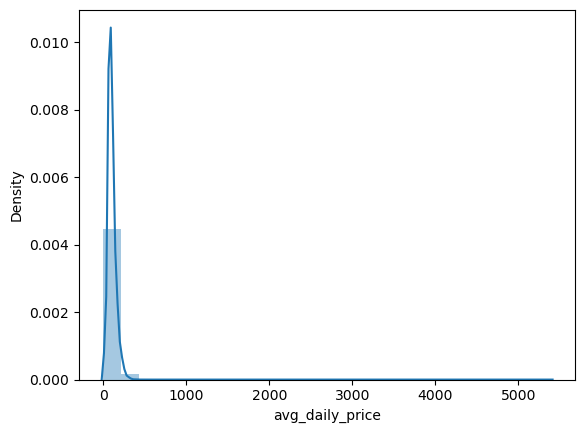

In [20]:
# Checking extreme values
sns.distplot(df['avg_daily_price'], bins=25) # Shows extreme values


There is an outlier of 5400. Let's try the analysis with this observation. 

## 3. Explore data for regression analysis 

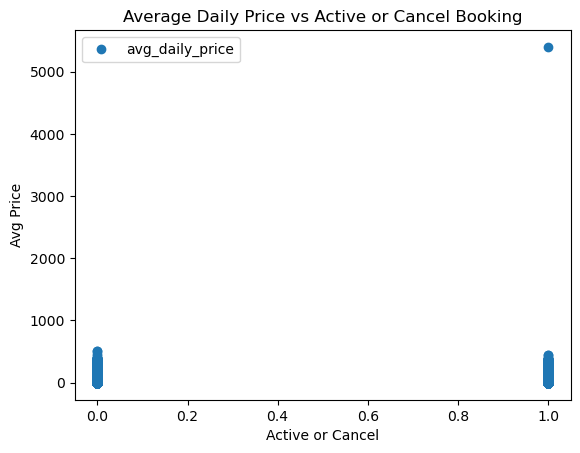

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Check if the price is different for Active and Cancelled Bookings
df.plot(x = 'is_canceled', y='avg_daily_price',style='o') 
plt.title('Average Daily Price vs Active or Cancel Booking')  
plt.xlabel('Active or Cancel')  
plt.ylabel('Avg Price')  
plt.show()

Looks like there is no difference between the prices of the cancel bookings and the prices of the active bookings. 

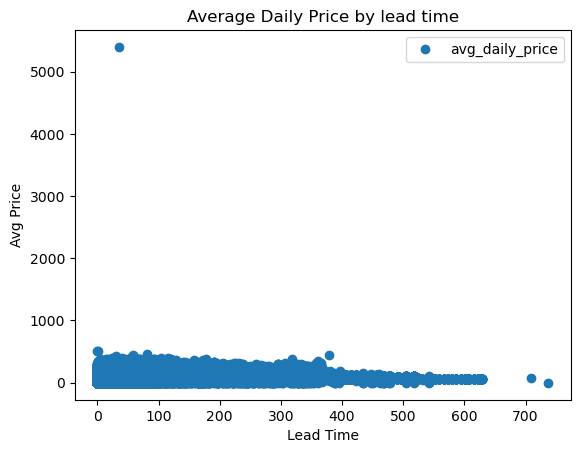

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Check if the price is different according to the lead time
df.plot(x = 'lead_time', y='avg_daily_price',style='o') 
plt.title('Average Daily Price by lead time')  
plt.xlabel('Lead Time')  
plt.ylabel('Avg Price')  
plt.show()

We can identify an outlier above 5000 (avg_daily_price). With this scale of the scatterplot, due to the outlier, looks like there is some differences between average daily price according to the lead time, that represents the booking advance in number of days.  

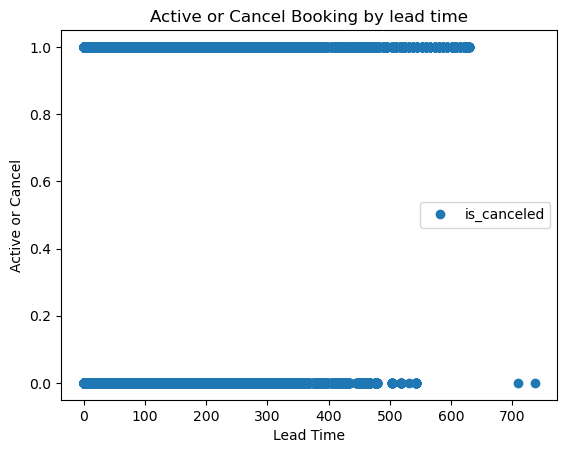

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Check the cancellation according to the lead time
df.plot(x = 'lead_time', y='is_canceled',style='o') 
plt.title('Active or Cancel Booking by lead time')  
plt.xlabel('Lead Time')  
plt.ylabel('Active or Cancel')  
plt.show()

Looks there is a high probability to cancel the booking for the bookings done with more than 

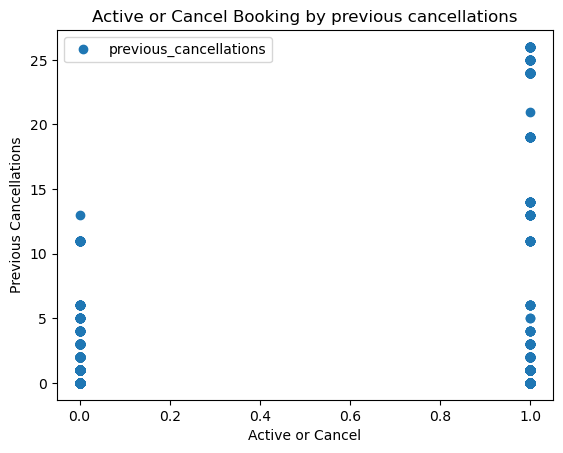

In [46]:
# Check the cancellation according to the lead time
df.plot(x = 'is_canceled', y='previous_cancellations',style='o') 
plt.title('Active or Cancel Booking by previous cancellations')  
plt.xlabel('Active or Cancel')  
plt.ylabel('Previous Cancellations')  
plt.show()

Clients with high number of previous cancellations tends to cancel more. 

In [29]:
# let's do the anala
# Delete the outlier of avg_daily_price
no_outlier=df[df['avg_daily_price'] <=5000]

In [30]:
no_outlier.shape

(119389, 34)

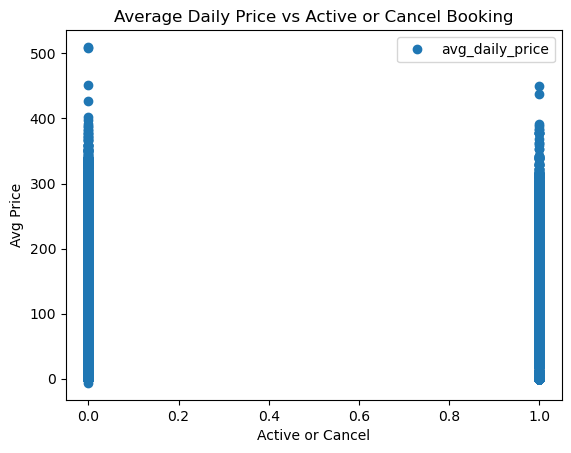

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Check if the price is different for Active and Cancelled Bookings
no_outlier.plot(x = 'is_canceled', y='avg_daily_price',style='o') 
plt.title('Average Daily Price vs Active or Cancel Booking')  
plt.xlabel('Active or Cancel')  
plt.ylabel('Avg Price')  
plt.show()

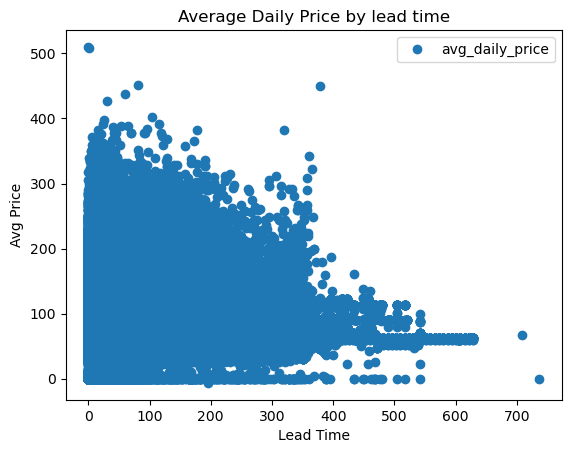

In [34]:
# Check if the price is different according to the lead time
no_outlier.plot(x = 'lead_time', y='avg_daily_price',style='o') 
plt.title('Average Daily Price by lead time')  
plt.xlabel('Lead Time')  
plt.ylabel('Avg Price')  
plt.show()

The average daily price is lower when the lead time is higher. Than mean when the client book the hotel in advance more than one year the average price is lower. Clients that book the hotel in short period of time (before arrive) pay a higher daily price.

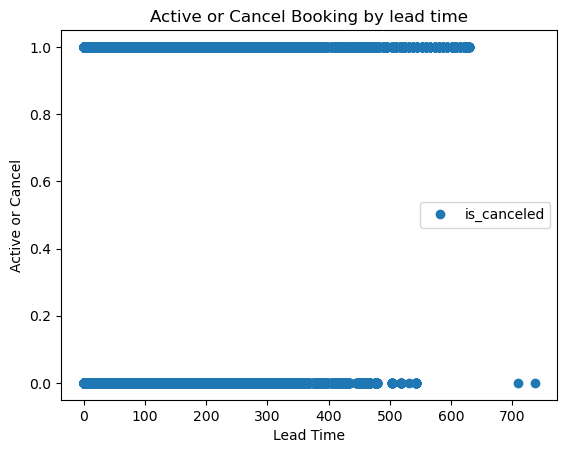

In [47]:
# Check the cancellation according to the lead time
no_outlier.plot(x = 'lead_time', y='is_canceled',style='o') 
plt.title('Active or Cancel Booking by lead time')  
plt.xlabel('Lead Time')  
plt.ylabel('Active or Cancel')  
plt.show()

## 4. State the Hypothesis to test

Is the average daily price higher for the bookings that cancel the say?

## 5. Reshape the variables into NUmPy arrays (X as the independent variable and y as the dependent variable)

In [66]:
# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
X = no_outlier['lead_time'].values.reshape(-1,1)
y = no_outlier['avg_daily_price'].values.reshape(-1,1)

In [67]:
X

array([[342],
       [737],
       [  7],
       ...,
       [ 34],
       [109],
       [205]], dtype=int64)

In [68]:
y

array([[  0.  ],
       [  0.  ],
       [ 75.  ],
       ...,
       [157.71],
       [104.4 ],
       [151.2 ]])

## 6.Split the data into two sets: a training set and a test set.

In [69]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Linear Regression

## 7.1 Fit the model to the training set and create a prediction for y in the test set

In [71]:
# Create a regression object
regression = LinearRegression()  

In [72]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 8. Create a plot that shows the regression line on the test set

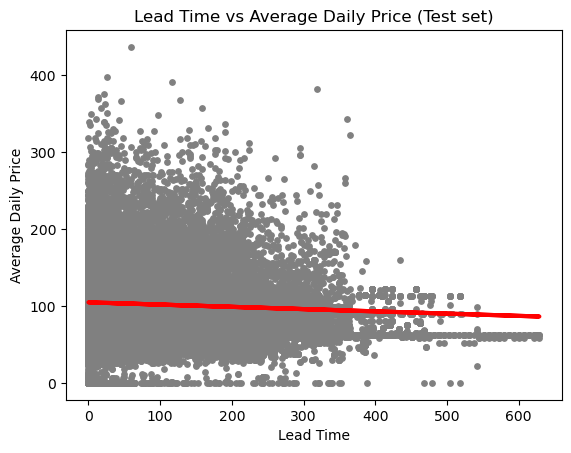

In [76]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lead Time vs Average Daily Price (Test set)')
plot_test.xlabel('Lead Time')
plot_test.ylabel('Average Daily Price')
plot_test.show()

## 9. Interpretation 

The data set has 119389 records, that is a good size to split the data into train and test sets.
The linear regression shows a decrease relation, that means when the lead time (independent variable) increase the average daily price (dependent variable) decrease.
The observations show a high range price for the same lead time, however in my opinion the linear predition (red line) capture the relationship of the two variables but not with the best accuracy.

## 10. Check the model performance statistics—MSE and R2 score

In [78]:
 # This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted)

# This is the R2 score
r2 = r2_score(y_test, y_predicted) 

In [79]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02929503]]
Mean squared error:  2286.843389511165
R2 score:  0.004531612848227118


A small MSE means that the regression line passes fairly close to the observations, in this case 2287 is a quite large MSE.
The R2 score is very low, this highlight that the model is not fit great. 

## 11. Compare the predicted y values with the actual y values in a dataframe

In [80]:
y_predicted

array([[ 94.43454609],
       [100.64509142],
       [ 95.89929735],
       ...,
       [102.72503821],
       [103.75036409],
       [103.80895414]])

In [81]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,37.56,94.434546
1,86.10,100.645091
2,62.00,95.899297
3,155.00,104.775690
4,62.00,95.635642
5,130.00,100.176371
6,107.10,98.213604
7,196.50,104.599920
8,125.00,101.494647
9,75.00,103.164464


The dataframe of the actual and predicted y values shows big difference between both.

## 12. Thoughts on how well the model performed on the test set

The model summary statistics indicates a poor fit of the model.
In this case the MSE is high and that means the regression line passes fairly far to the observations. The R2 is very low. Overall analysing the model summary statistics we can conclude the model fits poorly.

The comparison between actual and predict y values support the poor fit of the model.

When we compare the actual and the predicted y values we conclude them show a big difference.

All the analysis above indicate the regression model that predicts the average daily price based on the lead time is a poor model.

In terms of bias, I am not what currency is in average daily price. If there are different currencies in the data base this can impact the model fit.